## Import libraries

In [11]:
import quail
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import rpy2
import numpy as np

%matplotlib inline 
sns.set_context("notebook", font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [12]:
# transcription 
auto = quail.load_egg('../data/auto_egg.egg')
man = quail.load_egg('../data/man_egg.egg')

# number of subjects    
n_subs = len(auto.pres[0]) / len(man.rec.ix[0])

## Stack eggs 

In [13]:
egg = quail.stack_eggs([man, auto])

# Plots

### Serial Position Curve

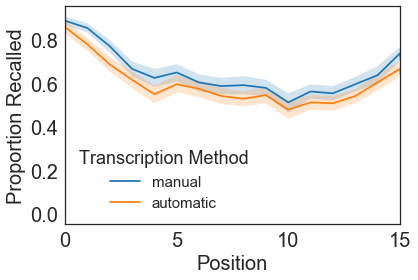

In [14]:
analyzed_egg = quail.analyze(egg, analysis='spc', listgroup=['average']*8)
sns.set_style('white')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['automatic']*n_subs, plot_type='subject')

### Probability of First Recall

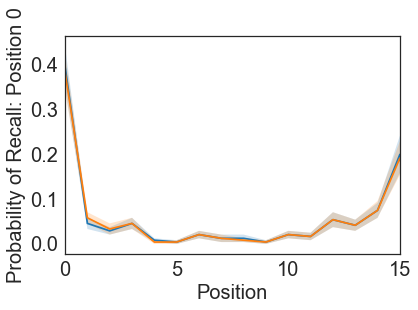

In [15]:
analyzed_egg = quail.analyze(egg, analysis='pfr', listgroup=['average']*8)
sns.set_style('white')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject', legend=False)

### Lag CRP

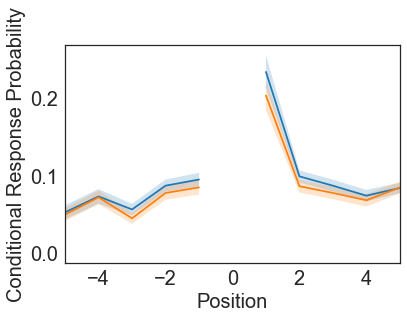

In [16]:
analyzed_egg = quail.analyze(egg, analysis='lagcrp', listgroup=['average']*8)
sns.set_style('white')

ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject', legend=False)

### Accuracy scatter

(0.9433760929879108, 6.023095963686493e-15)


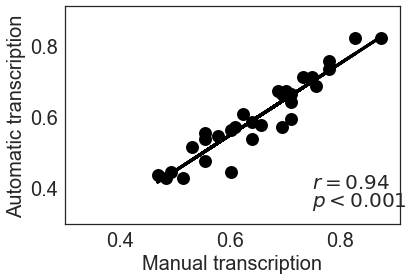

In [17]:
analyzed_auto_acc = quail.analyze(auto, analysis='accuracy', listgroup=['average']*8)
analyzed_man_acc = quail.analyze(man, analysis='accuracy', listgroup=['average']*8)

man_acc = list(analyzed_man_acc[0])
auto_acc = list(analyzed_auto_acc[0])

fig = plt.figure(1)
ax = fig.add_subplot(111)
reg_line = np.polyfit(man_acc, auto_acc, 1)
plt.plot(man_acc, np.poly1d(reg_line)(man_acc), color='black', linewidth=3.0)
ax.scatter(man_acc, auto_acc, c=('black'), s=120, linewidth=2.0)
plt.grid(False)
plt.axis([.3, .91, .3, .91])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Manual transcription', fontsize = 20)
plt.ylabel('Automatic transcription', fontsize = 20)

from scipy.stats import pearsonr
r = pearsonr(man_acc, auto_acc)
plt.text(0.75, 0.4, '$r=0.94$', fontsize=20)
plt.text(0.75, 0.35, '$p<0.001$', fontsize=20)
print r

### Primacy effect scatter

In [18]:
### first three words of each list for each subject (auto transcription)
pres_primacy_auto = auto.pres.ix[:,0:2]

# lists for recall accuracy for first 3 words in each list for each subject (auto transcription)
pres_primacy_auto_list = []
rec_primacy_auto_list = []

for sub in range(n_subs):
    pres_primacy_auto_list.append(pres_primacy_auto.ix[sub].values.tolist())
    rec_primacy_auto_list.append(auto.rec.ix[sub].values.tolist())
    
# compute recall accuracy for first 3 words in each list for each subject (auto transcription)
egg_primacy_auto = quail.Egg(pres=pres_primacy_auto_list, rec=rec_primacy_auto_list)
analyzed_primacy_egg_auto = quail.analyze(egg_primacy_auto, analysis='accuracy', listgroup=['average']*8)

# list of accuracies for each subject, averaged across 8 lists (auto)
primacy_auto_list = analyzed_primacy_egg_auto.ix[:,0].tolist()


### words 4-10 of each list for each subject
pres_other_auto = auto.pres.ix[:,3:9]

# lists for recall accuracy for words 4-10 in each list for each subject (auto transcription)
pres_other_auto_list = []
rec_other_auto_list = []

for sub in range(n_subs):
    pres_other_auto_list.append(pres_other_auto.ix[sub].values.tolist())
    rec_other_auto_list.append(auto.rec.ix[sub].values.tolist())
    
# compute recall accuracy for words 4-10 in each list for each subject (auto transcription)
egg_other_auto = quail.Egg(pres=pres_other_auto_list, rec=rec_other_auto_list)
analyzed_other_egg_auto = quail.analyze(egg_other_auto, analysis='accuracy', listgroup=['average']*8)

# list of accuracies for each subject, averaged across 8 lists (auto)
other_auto_list = analyzed_other_egg_auto.ix[:,0].tolist()


#### create ratio list for primacy effect (auto)
primacy_effect_auto = []
for i in range(n_subs):
    ratio = primacy_auto_list[i]/other_auto_list[i]
    primacy_effect_auto.append(ratio)
    

#### first three words of each list for each subject
pres_primacy_man = man.pres.ix[:,0:2]

# lists for recall accuracy for first 3 words in each list for each subject (manual transcription)
pres_primacy_man_list = []
rec_primacy_man_list = []

for sub in range(n_subs):
    pres_primacy_man_list.append(pres_primacy_man.ix[sub].values.tolist())
    rec_primacy_man_list.append(man.rec.ix[sub].values.tolist())
    
# compute recall accuracy for first 3 words in each list for each subject (manual transcription)
egg_primacy_man = quail.Egg(pres=pres_primacy_man_list, rec=rec_primacy_man_list)
analyzed_primacy_egg_man = quail.analyze(egg_primacy_man, analysis='accuracy', listgroup=['average']*8)

# list of accuracies for each subject, averaged across 8 lists (manual)
primacy_man_list = analyzed_primacy_egg_man.ix[:,0].tolist()


#### words 4-10 of each list for each subject
pres_other_man = auto.pres.ix[:,3:9]

# lists for recalled accuracy for words 4-10 in each list for each subject (manual transcription)
pres_other_man_list = []
rec_other_man_list = []

for sub in range(n_subs):
    pres_other_man_list.append(pres_other_man.ix[sub].values.tolist())
    rec_other_man_list.append(auto.rec.ix[sub].values.tolist())
    
# compute recall accuracy for words 4-10 in each list for each subject (manual transcription)
egg_other_man = quail.Egg(pres=pres_other_man_list, rec=rec_other_man_list)
analyzed_other_egg_man = quail.analyze(egg_other_man, analysis='accuracy', listgroup=['average']*8)

# list of accuracies for each subject, averaged across 8 lists (manual)
other_man_list = analyzed_other_egg_man.ix[:,0].tolist()

#### create ratio list for primacy effect (manual)
primacy_effect_man = []
for i in range(n_subs):
    ratio = primacy_man_list[i]/other_man_list[i]
    primacy_effect_man.append(ratio)


(0.9285580886596637, 1.4222986059817875e-13)


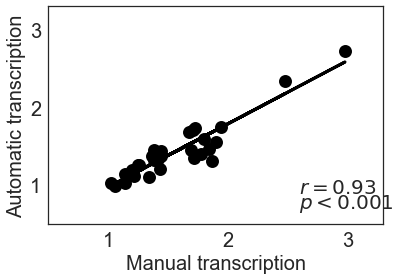

In [19]:
fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.scatter(primacy_effect_man, primacy_effect_auto, c='black', s=120, linewidth=2.0)
plt.grid(False)
plt.axis([0.5, 3.3, 0.5, 3.3])

plt.xlabel('Manual transcription', fontsize=20)
plt.ylabel('Automatic transcription', fontsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

reg_line = np.polyfit(primacy_effect_man, primacy_effect_auto, 1)
plt.plot(primacy_effect_man, np.poly1d(reg_line)(primacy_effect_man), color='black', linewidth=3.0)

from scipy.stats import pearsonr
r = pearsonr(primacy_effect_man, primacy_effect_auto)
plt.text(2.6, .9, '$r=0.93$', fontsize=20)
plt.text(2.6, 0.7, '$p<0.001$', fontsize=20)
print r

### Temporal clustering scatter

(0.9722088872860909, 3.387761037449716e-19)


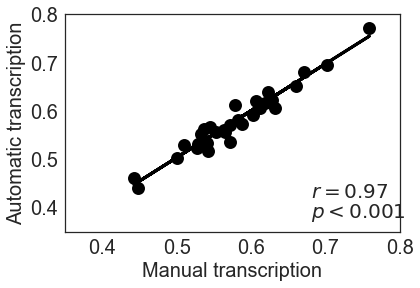

In [20]:
analyzed_auto_temp = quail.analyze(auto, analysis='temporal', listgroup=['average']*8)
analyzed_man_temp = quail.analyze(man, analysis='temporal', listgroup=['average']*8)

man_temp = list(analyzed_man_temp[0])
auto_temp = list(analyzed_auto_temp[0])

fig = plt.figure(3)
ax = fig.add_subplot(111)
ax.scatter(man_temp, auto_temp, c='black', s=120, linewidth=2.0)
plt.grid(False)
plt.axis([.35, .8, .35, .8])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Manual transcription', fontsize=20)
plt.ylabel('Automatic transcription', fontsize=20)

reg_line = np.polyfit(man_temp, auto_temp, 1)
plt.plot(man_temp, np.poly1d(reg_line)(man_temp), color='black', linewidth=3.0)

from scipy.stats import pearsonr
r = pearsonr(man_temp, auto_temp)
plt.text(.68, .42, '$r=0.97$', fontsize=20)
plt.text(.68, .38, '$p<0.001$', fontsize=20)
print r